<a href="https://colab.research.google.com/github/josecanal-00/portfolio/blob/main/ML_Churn_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Churn Predicting from Kaggle Database

#Jose Cañal

#Importar Librerias y Limpiar Datos

In [ ]:
# Importar librerías
import os
import kagglehub
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime as dt
import time, warnings
from matplotlib.ticker import FuncFormatter
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download latest version
path = kagglehub.dataset_download("sakshigoyal7/credit-card-customers")

print("Path to dataset files:", path)

100%|██████████| 379k/379k [00:00<00:00, 14.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sakshigoyal7/credit-card-customers/versions/1


In [ ]:
import os

# List files in the downloaded path to find the correct CSV name
files = os.listdir(path)
print(f"Files in {path}: {files}")

# Try to find a CSV file in the directory
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df_credito = pd.read_csv(file_path)
    print(f"Successfully loaded: {file_path}")
    display(df_credito.head())
else:
    print("No CSV files found in the directory.")

Files in /root/.cache/kagglehub/datasets/sakshigoyal7/credit-card-customers/versions/1: ['BankChurners.csv']
Successfully loaded: /root/.cache/kagglehub/datasets/sakshigoyal7/credit-card-customers/versions/1/BankChurners.csv


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df_credito = df_credito.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [ ]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df_credito.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


#Analisis Exploratorio

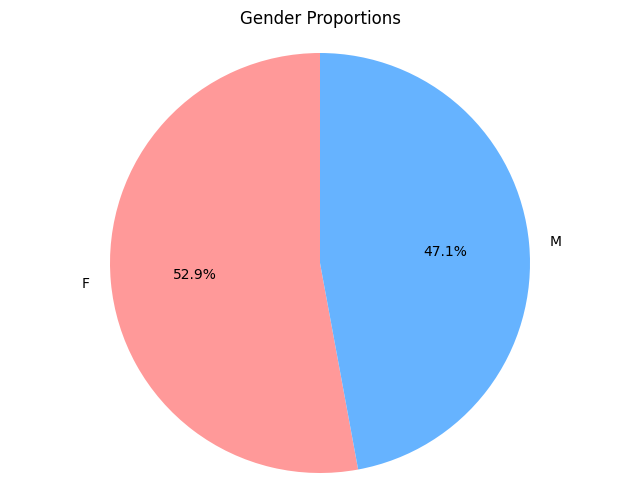

In [ ]:
# Calculate gender counts
gender_counts = df_credito['Gender'].value_counts()

# Create the donut chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

plt.title('Gender Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

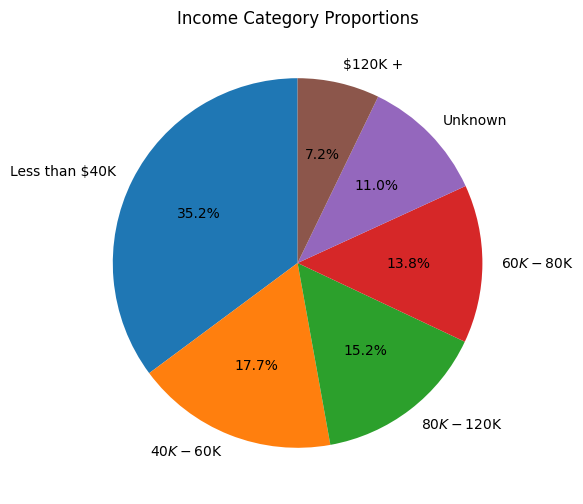

In [ ]:
# Calculate income category counts
income_category_counts = df_credito['Income_Category'].value_counts()

# Create the donut chart
plt.figure(figsize=(8, 6))
plt.pie(income_category_counts, labels=income_category_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Income Category Proportions')
plt.show()

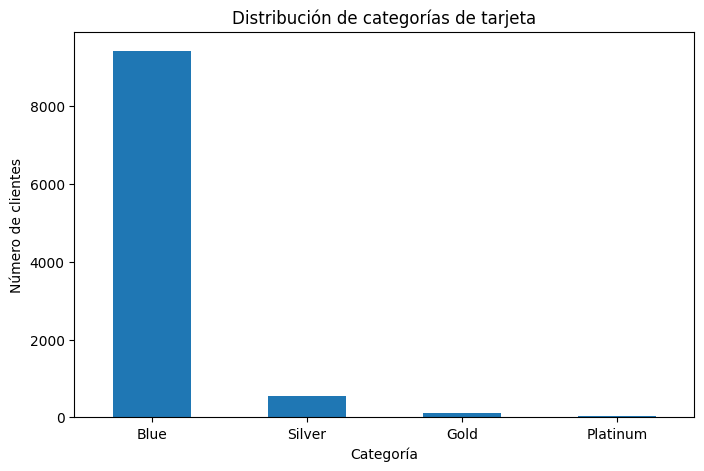

In [ ]:
# Calculate income category counts
card_category_counts = df_credito['Card_Category'].value_counts()

# Create the chart
plt.figure(figsize=(8, 5))
card_category_counts.plot(kind='bar')

plt.title('Distribución de categorías de tarjeta')
plt.ylabel('Número de clientes')
plt.xlabel('Categoría')
plt.xticks(rotation=0)
plt.show()


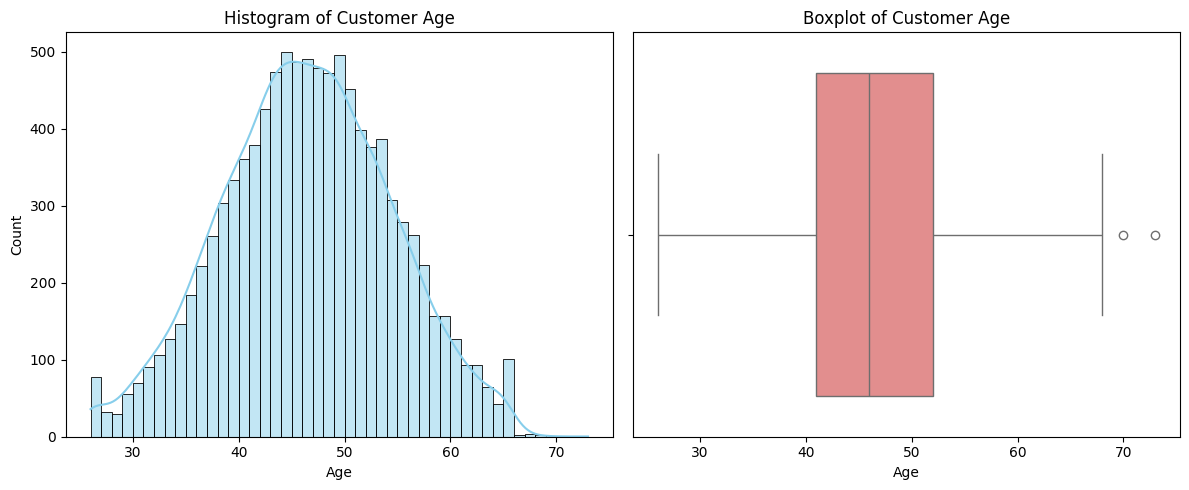

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_credito['Customer_Age'], kde=True, color='skyblue')
plt.title('Histogram of Customer Age')
plt.xlabel('Age')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_credito['Customer_Age'], color='lightcoral')
plt.title('Boxplot of Customer Age')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

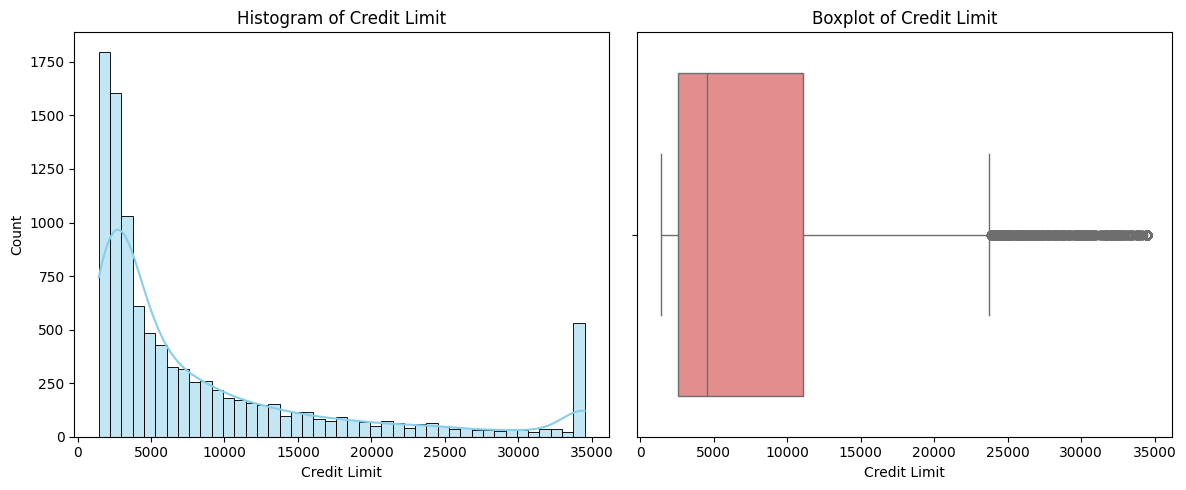

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_credito['Credit_Limit'], kde=True, color='skyblue')
plt.title('Histogram of Credit Limit')
plt.xlabel('Credit Limit')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_credito['Credit_Limit'], color='lightcoral')
plt.title('Boxplot of Credit Limit')
plt.xlabel('Credit Limit')

plt.tight_layout()
plt.show()

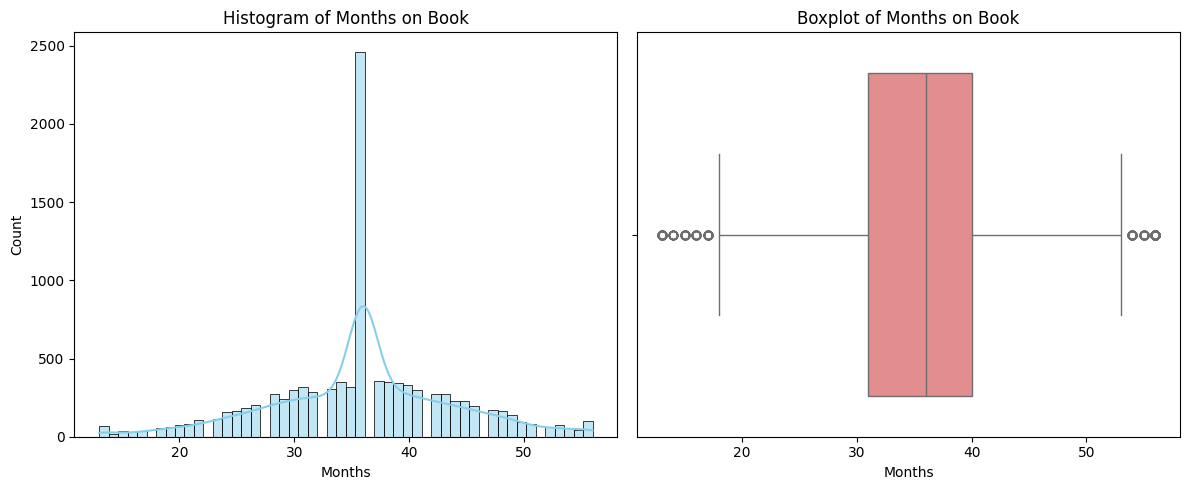

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_credito['Months_on_book'], kde=True, color='skyblue')
plt.title('Histogram of Months on Book')
plt.xlabel('Months')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_credito['Months_on_book'], color='lightcoral')
plt.title('Boxplot of Months on Book')
plt.xlabel('Months')

plt.tight_layout()
plt.show()

In [ ]:
churn = df_credito["Attrition_Flag"].value_counts()
print(churn)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


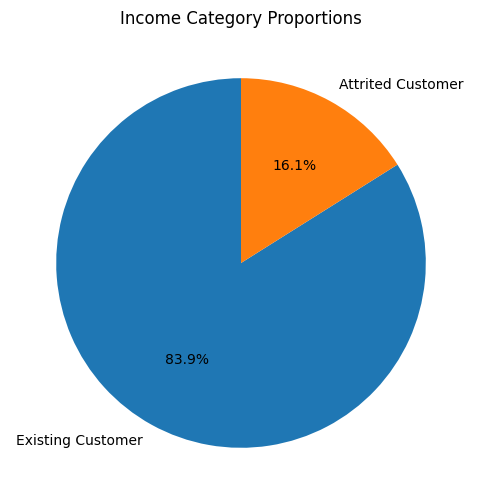

In [ ]:
#Crear el grafico
plt.figure(figsize=(8, 6))
plt.pie(churn, labels=churn.index, autopct='%1.1f%%', startangle=90)

plt.title('Income Category Proportions')
plt.show()

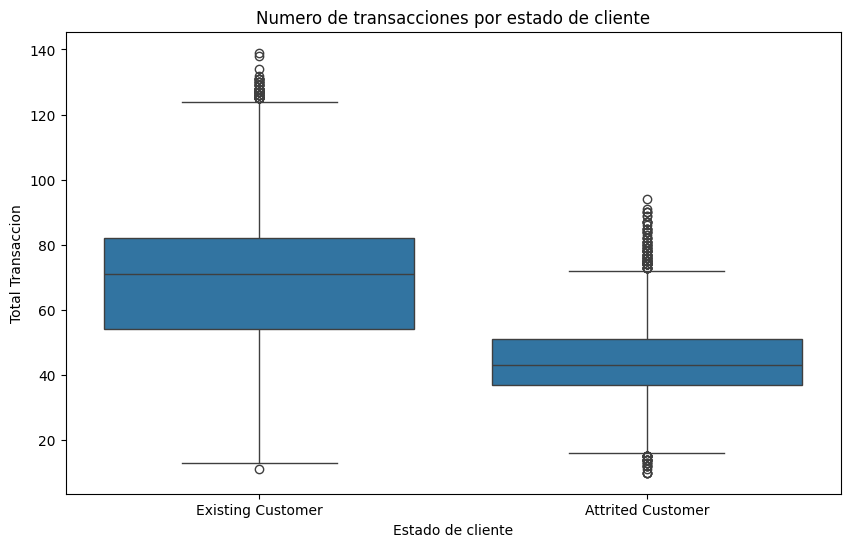

In [ ]:
#Boxplot de numero de transacciones por estado de cliente
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_credito, x='Attrition_Flag', y='Total_Trans_Ct')
plt.title('Numero de transacciones por estado de cliente')
plt.xlabel('Estado de cliente')
plt.ylabel('Total Transaccion')
plt.show()

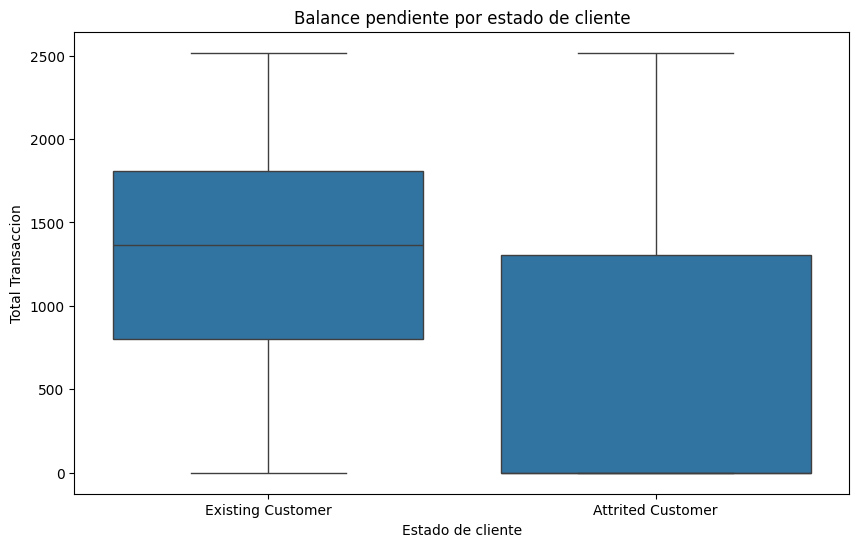

In [ ]:
#Boxplot de total balance pendiente por estado de cliente
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_credito, x='Attrition_Flag', y='Total_Revolving_Bal')
plt.title('Balance pendiente por estado de cliente')
plt.xlabel('Estado de cliente')
plt.ylabel('Total Transaccion')
plt.show()

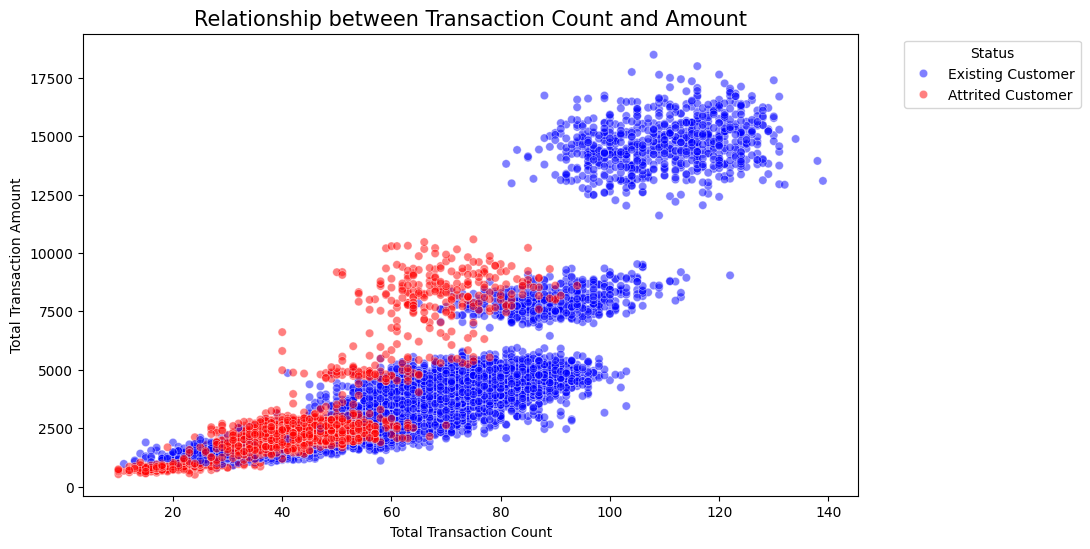

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_credito, x='Total_Trans_Ct', y='Total_Trans_Amt',
                hue='Attrition_Flag', alpha=0.5, palette={'Existing Customer': 'blue', 'Attrited Customer': 'red'})

plt.title('Relationship between Transaction Count and Amount', fontsize=15)
plt.xlabel('Total Transaction Count')
plt.ylabel('Total Transaction Amount')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Codificar las variables

In [ ]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataframe
df_encoded = df_credito.copy()

# Identify categorical columns (object type)
object_cols = df_encoded.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each object column in the new dataframe
for col in object_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Verify the changes
print(f"Encoded columns: {list(object_cols)}")
print("A new dataframe 'df_encoded' has been created.")
display(df_encoded.head())

Encoded columns: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
A new dataframe 'df_encoded' has been created.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


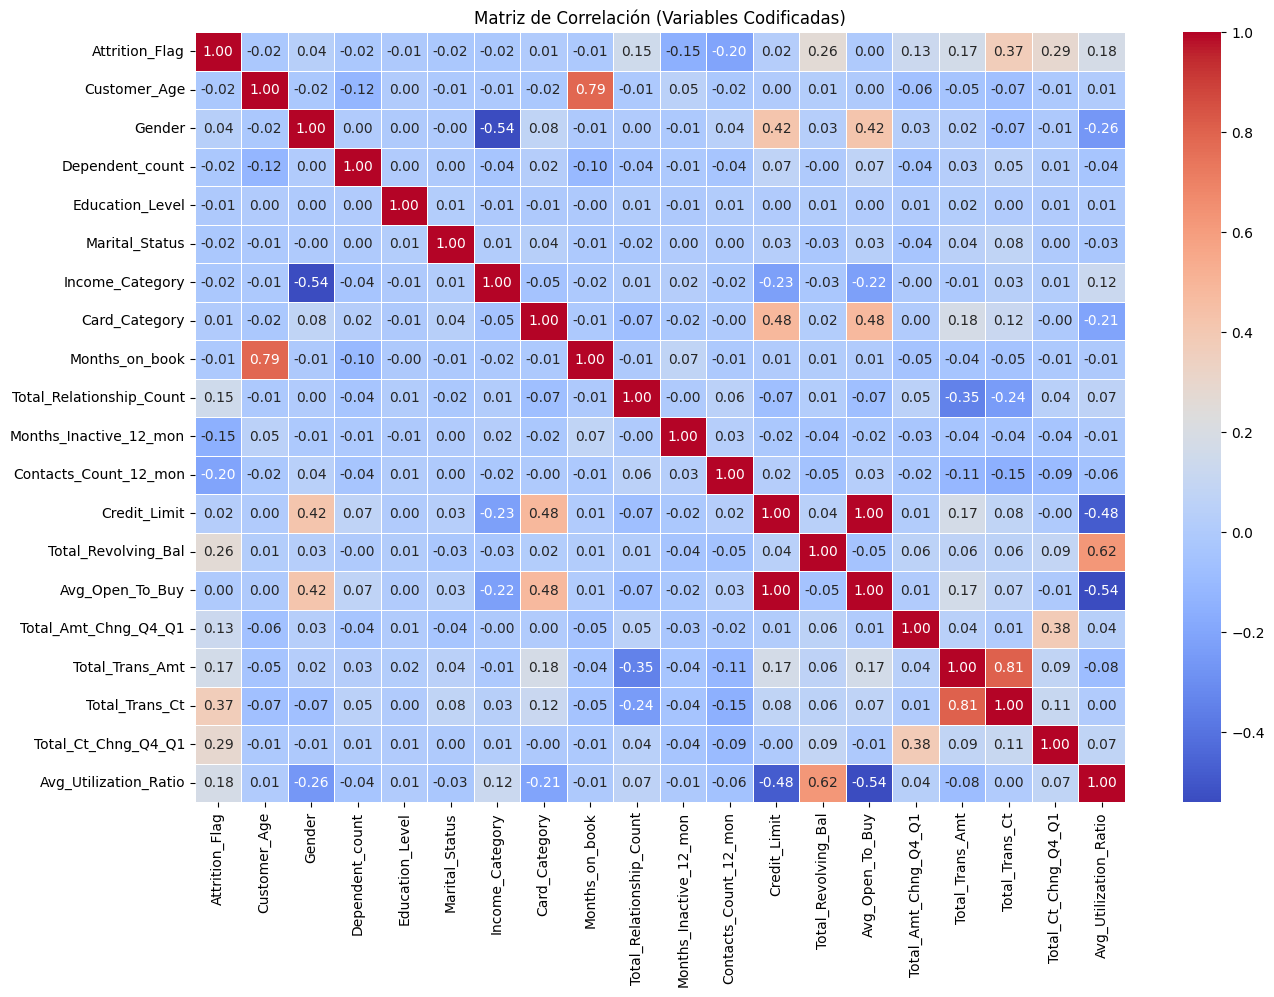

In [ ]:
# Matriz de correlación using the encoded dataframe
# We drop 'CLIENTNUM' as it's an ID and 'Attrition_Flag' if we want to see features only,
# but typically we keep the target to see its relationship with others.
df_corr = df_encoded.drop(columns=["CLIENTNUM"])
correlation_matrix = df_corr.corr()

# Visualizar la matriz
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Matriz de Correlación (Variables Codificadas)")
plt.show()

#Modelaje

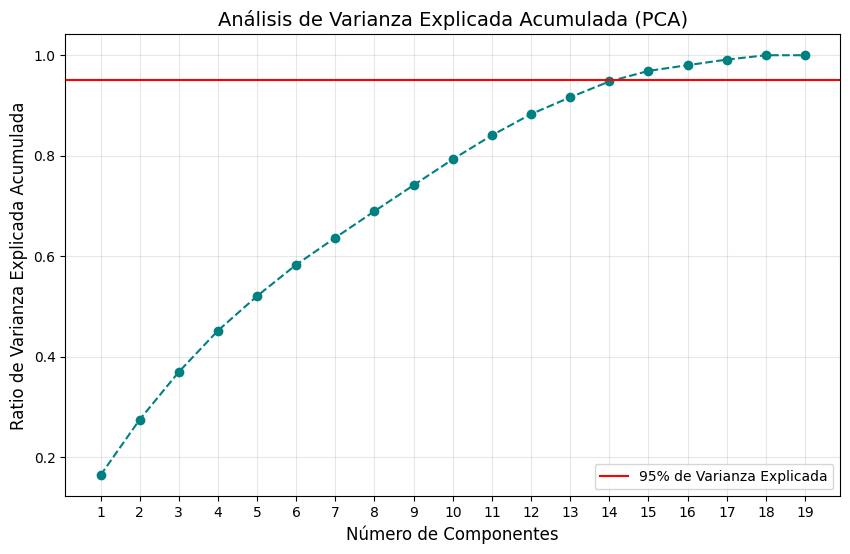

In [ ]:
from sklearn.decomposition import PCA

# 1. Extract the feature matrix from df_encoded
X_pca = df_encoded.drop(columns=['CLIENTNUM', 'Attrition_Flag'])

# 2. Use StandardScaler to scale the features
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

# 3. Apply PCA without specifying the number of components
pca = PCA()
pca.fit(X_pca_scaled)

# 4. Calculate the cumulative sum of the explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 5. Create a line plot showing cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='teal')

# 6. Add informative labels, title, and a 95% threshold line
plt.title('Análisis de Varianza Explicada Acumulada (PCA)', fontsize=14)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Ratio de Varianza Explicada Acumulada', fontsize=12)
plt.axhline(y=0.95, color='red', linestyle='-', label='95% de Varianza Explicada')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.show()

In [ ]:
y = df_encoded['Attrition_Flag']

def evaluate_pca_model(n_comp):
    # 1. Initialize PCA
    pca_test = PCA(n_components=n_comp, random_state=42)
    X_pca_test = pca_test.fit_transform(X_pca_scaled)

    # 2. Split
    X_tr_pca, X_te_pca, y_tr_pca, y_te_pca = train_test_split(
        X_pca_test, y, test_size=0.2, random_state=42, stratify=y
    )

    # 3. Train
    model_pca = LogisticRegression(random_state=42, max_iter=10000)
    model_pca.fit(X_tr_pca, y_tr_pca)

    # 4. Predict and Evaluate
    y_p = model_pca.predict(X_te_pca)
    acc = accuracy_score(y_te_pca, y_p)
    print(f'--- PCA with {n_comp} Components ---')
    print(f'Accuracy Score: {acc:.4f}')
    print(classification_report(y_te_pca, y_p))
    print('-' * 40)

# Evaluate for 3 and 5 components
evaluate_pca_model(3)
evaluate_pca_model(5)
evaluate_pca_model(15)

--- PCA with 3 Components ---
Accuracy Score: 0.8366
              precision    recall  f1-score   support

           0       0.41      0.04      0.08       325
           1       0.84      0.99      0.91      1701

    accuracy                           0.84      2026
   macro avg       0.63      0.52      0.49      2026
weighted avg       0.77      0.84      0.78      2026

----------------------------------------
--- PCA with 5 Components ---
Accuracy Score: 0.8815
              precision    recall  f1-score   support

           0       0.78      0.36      0.50       325
           1       0.89      0.98      0.93      1701

    accuracy                           0.88      2026
   macro avg       0.84      0.67      0.71      2026
weighted avg       0.87      0.88      0.86      2026

----------------------------------------
--- PCA with 15 Components ---
Accuracy Score: 0.8924
              precision    recall  f1-score   support

           0       0.76      0.48      0.59      

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0. Prepare Data
X = df_encoded.drop(columns=['CLIENTNUM', 'Attrition_Flag'])
y = df_encoded['Attrition_Flag']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression with Class Weighting
log_reg_balanced = LogisticRegression(random_state=42, max_iter=10000, class_weight='balanced')
log_reg_balanced.fit(X_train_scaled, y_train)

y_pred_bal = log_reg_balanced.predict(X_test_scaled)

print("--- Logistic Regression (Balanced Weights) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bal):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_bal))

print("\n" + "="*50 + "\n")

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("--- Random Forest (Balanced) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

--- Logistic Regression (Balanced Weights) ---
Accuracy: 0.8396
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.84      0.63       325
           1       0.96      0.84      0.90      1701

    accuracy                           0.84      2026
   macro avg       0.73      0.84      0.76      2026
weighted avg       0.89      0.84      0.85      2026



--- Random Forest (Balanced) ---
Accuracy: 0.9600
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



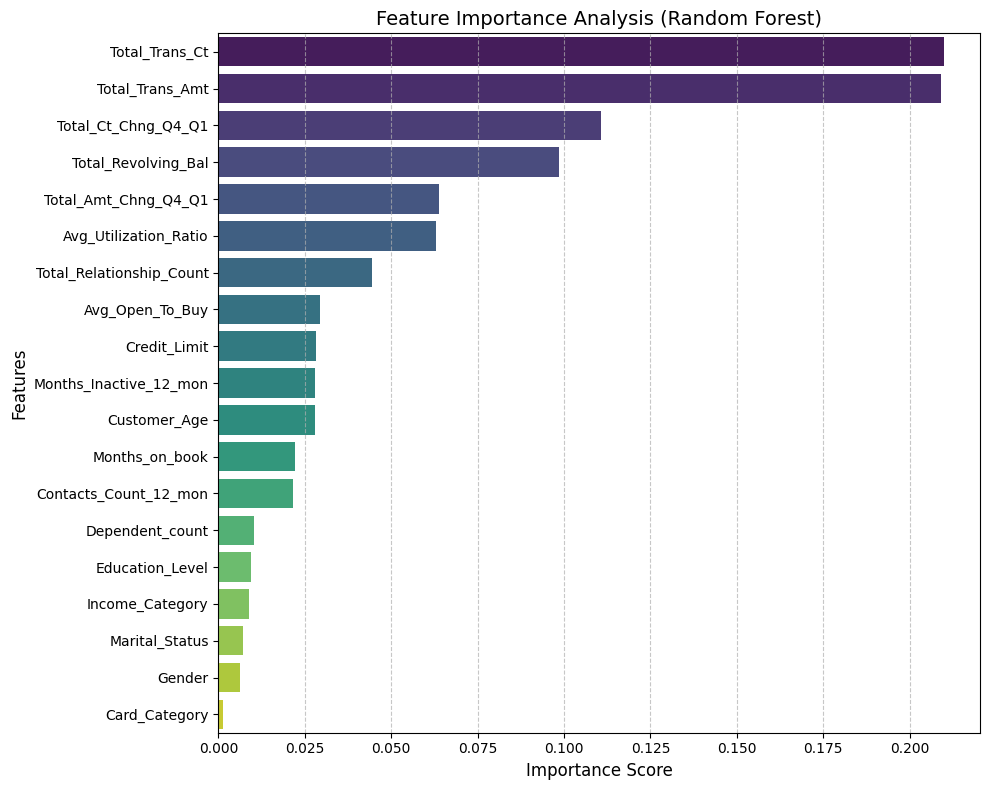

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Retrieve feature importance scores
importances = rf_model.feature_importances_

# 2. Create a pandas Series with feature names
feature_importance_series = pd.Series(importances, index=X.columns)

# 3. Sort the Series in descending order
feature_importance_sorted = feature_importance_series.sort_values(ascending=False)

# 4. Generate a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_sorted.values, y=feature_importance_sorted.index, palette='viridis')

# 5. Add titles and labels
plt.title('Feature Importance Analysis (Random Forest)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

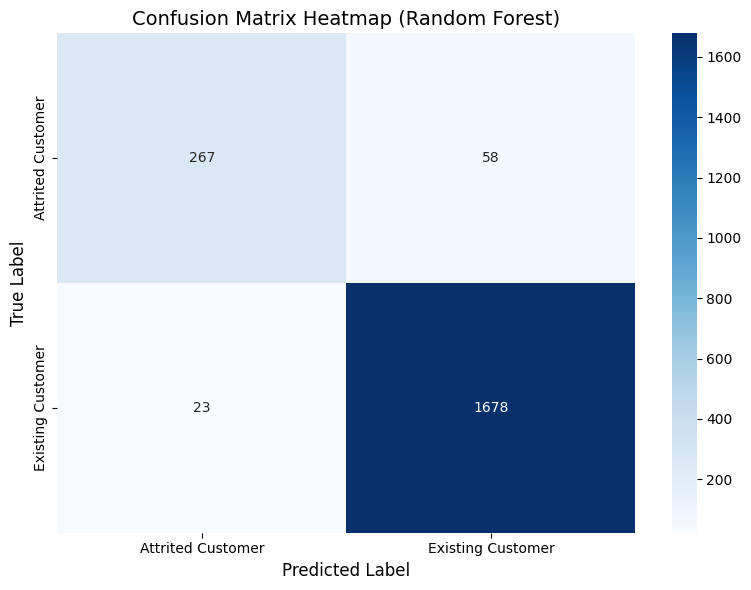

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# 2. Define the class labels
class_names = ['Attrited Customer', 'Existing Customer']

# 3. Create the heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# 4. Add labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix Heatmap (Random Forest)', fontsize=14)

plt.tight_layout()
plt.show()